In [4]:
import torch
import torchvision
import torchvision.transforms as transforms


In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


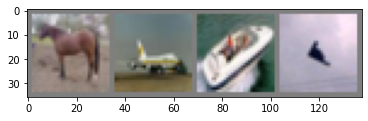

In [7]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img=img=img/2 +0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

dataiter=iter(trainloader)#işlemleri hangi sıklıkla yaptığımızı beliteceğiz
images,labels=dataiter.next()#her seferinde batch_size kadar resim üretilecek
imshow(torchvision.utils.make_grid(images))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,6,3)
        self.conv2=nn.Conv2d(6,9,3)
        self.conv3=nn.Conv2d(9,12,3)
        self.pool=nn.MaxPool2d(2,2)
        self.conv4=nn.Conv2d(12,12,3)
        self.fc1=nn.Linear(1452,10)
    
    def forward(self,x,y):
        x=self.conv1(x)
        x=F.relu(x)
        x=self.conv3(F.relu(self.conv2(x)))
        x=F.relu(self.conv4(self.pool(x)))
        
        #flaten
        x=x.view(-1,1452)
        x=self.fc1(x)
        x=F.softmax(x)
        return x
        
        

In [ ]:

import torch.optim as optim
net=NN()

criterion=nn.CrossEntropyLoss()

optimizer=optim.Adam(net.parameters(),lr=0.001)

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:   
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')